## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## ANALYSIS FOR MICROSOFT'S SUCCESS ON NEW MOVIE STUDIO

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Project Overview

In the fast evolving entertainment industry, Microsoft desires to venture into original video content production so as to diversify its portfolio. For Microsoft to embark on this journey, it needs to understand the dynamics of the movie industry, and the films that are currently doing well in the box office. This project seeks to help Microsoft make informed decisions on what movies to create and provide insights into the movie market.

## Objectives of the Study

To identify what type of films do well in the domestic  market

To identify what type of films do well in the foreign  market

To analyse the effect of rating on revenue

To find out whether runtime can affect movie success

To identify growth patterns of film industry over the years


## Data Understanding

The analysis used data from IMDB data base which are in the folder IMDB Data and in csv file format.The data files include 'bom.movie_gross.csv', 'title.basics.csv' and 'title.ratings.csv'. To proceed with data analysis, we first have to understand our datasets, what is in them and the data quality

In [211]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
#first we will import the  'bom.movie_gross.csv' and name it df1 dataset and check the first five 
df1= pd.read_csv('./IMDB Data/bom.movie_gross.csv')
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [213]:
#import the second dataset 'title.basics.csv' and name it df2 and check first five
df2= pd.read_csv('./IMDB Data/title.basics.csv')
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [214]:
# import the third dataset 'title.ratings.csv' and name if df3 and check first five
df3= pd.read_csv('./IMDB Data/title.ratings.csv')
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Merging the three datasets as one

We can merge df1,df2 and df3 as one to make the work more clean. We have a common key in df2 and df3 (tconst). We can merge the two on tconst key.Then merge the outcome to df1 on 'title'

In [215]:
#merging df2 and df3 on 'tconst'
df2_and_df3 = pd.merge(df2,df3, on ='tconst', how='inner')
df2_and_df3

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


## Renaming 'title' column in df1

The 'title' column in df1 is equivalent to 'original_title' in df2. Hence, we can rename df1 'title' column to 'original_title' to enamble ease of merging.

In [216]:
df1.rename(columns={'title': 'original_title'}, inplace=True)

In [217]:
#merging df2_and_df3 and df1 on 'title'
merged_df=pd.merge(df2_and_df3, df1, on= 'original_title', how='inner')
merged_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
2443,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Eros,1200000.0,NaN,2018
2444,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
2445,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,CL,37700.0,NaN,2018


In [218]:
#Assign merged_df to the variable Data
data=merged_df

## Data Exploration

In [219]:
#displays the first five rows of our Data
data.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
2442,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
2443,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Eros,1200000.0,NaN,2018
2444,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
2445,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,CL,37700.0,NaN,2018
2446,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000,2018


In [220]:
#checking number of rows and columns
data.shape

(2447, 12)

In [221]:
# getting overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2447 non-null   object 
 1   primary_title    2447 non-null   object 
 2   original_title   2447 non-null   object 
 3   start_year       2447 non-null   int64  
 4   runtime_minutes  2402 non-null   float64
 5   genres           2443 non-null   object 
 6   averagerating    2447 non-null   float64
 7   numvotes         2447 non-null   int64  
 8   studio           2444 non-null   object 
 9   domestic_gross   2429 non-null   float64
 10  foreign_gross    1573 non-null   object 
 11  year             2447 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 248.5+ KB


The values in 'foreign_gross' column are type(object) instead of float64. We therefore must change it to the right type.To change data type we will first fill (NaN) with place holder value.

In [222]:
data['foreign_gross']

0             NaN
1         8000000
2         8000000
3         8000000
4       129900000
          ...    
2442      1800000
2443          NaN
2444          NaN
2445          NaN
2446     16100000
Name: foreign_gross, Length: 2447, dtype: object

In [223]:
#change 'foreign_gross' to numeric
data['foreign_gross'] = pd.to_numeric(data['foreign_gross'], errors='coerce')

In [224]:
data['foreign_gross'].dtypes

dtype('float64')

In [225]:
#inspecting the columns
data.columns   

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [226]:
#checking for missing data
data.isnull()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,False,False,False,False,False,False,False,False,False,False,False,False
2443,False,False,False,False,False,False,False,False,False,False,True,False
2444,False,False,False,False,False,False,False,False,False,False,True,False
2445,False,False,False,False,False,False,False,False,False,False,True,False


In [227]:
#summing the missing values
data.isnull().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
studio               3
domestic_gross      18
foreign_gross      877
year                 0
dtype: int64

In [228]:
#getting percentage of missing values
missing_data = data.isnull().sum() * 100/len(df1)
missing_data

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes     1.328609
genres              0.118099
averagerating       0.000000
numvotes            0.000000
studio              0.088574
domestic_gross      0.531444
foreign_gross      25.893121
year                0.000000
dtype: float64

## Missing Data Visualization
We can visualize missing values using seaborn heatmap

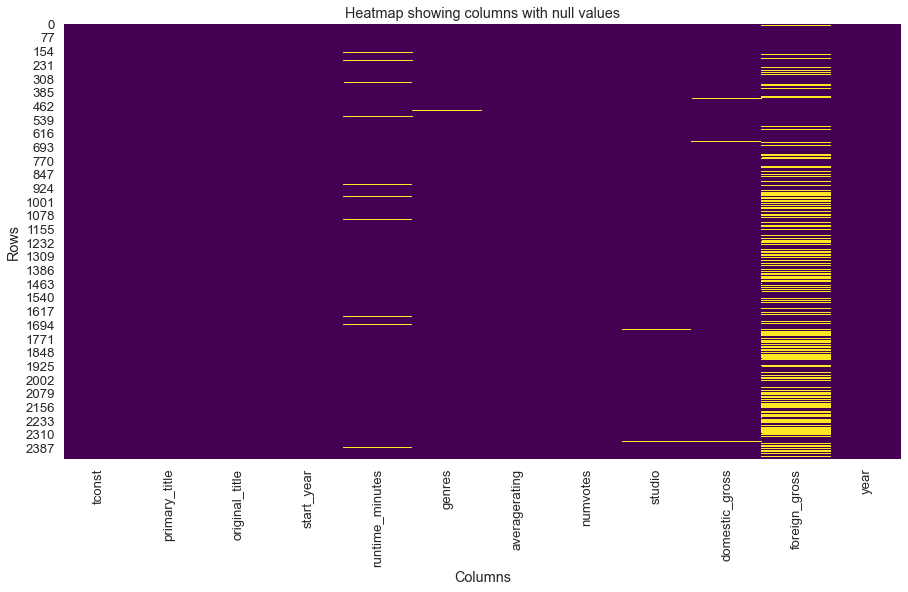

In [229]:
# set figure size
plt.figure(figsize=(15, 8))
# adjust font scale
sns.set(font_scale=1.2)
sns.heatmap(data.isnull(),  cbar=False, cmap='viridis', )
#set labels
plt.title('Heatmap showing columns with null values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

From the heatmap above we can see that null values are in foreign_gross column, domestic_gross column , studio column, genres column and runtime_minutes column

## Dealing with Missing data

Missing values for columns runtime_minutes is 1.328609%, genres is 0.118099%, studio is 0.088574%, domestic_gross is  0.531444%, and for foreign_gross is 25.804547%. We will replace missing runtime_minutesvalues with its median,the missing domestic_gross values with the median and foreign_gross missing values with the median as well.We chose to replace with median to avoid possible outliers that can affect the mean. For genres, we will replace the missing values with 'Unknown' and also for studio we will replace with 'Unkown'. This is to avoid filling wrong information in genres and studio columns which can affect validity of our analysis

In [230]:
#get statistical description of data set
data.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,2447.000000,2402.000000,2447.000000,2.447000e+03,2.429000e+03,1.570000e+03,2447.000000
mean,2013.774418,106.810575,6.406293,7.273033e+04,3.612440e+07,8.175892e+07,2014.001635
std,2.496398,20.061202,1.045029,1.345874e+05,6.952373e+07,1.396428e+08,2.464797
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,94.000000,5.800000,3.776000e+03,3.020000e+05,5.200000e+06,2012.000000
50%,2014.000000,104.000000,6.500000,2.074600e+04,5.100000e+06,2.340000e+07,2014.000000
75%,2016.000000,118.000000,7.100000,8.063900e+04,4.300000e+07,8.670000e+07,2016.000000
max,2019.000000,186.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


In [231]:
#data preview
data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013


In [232]:
data.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
2442,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000.0,2018
2443,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Eros,1200000.0,NaN,2018
2444,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
2445,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,CL,37700.0,NaN,2018
2446,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000.0,2018


### Cleaning missing values in 'runtime_minutes' column

In [233]:
#Replace missing runtime_minutes with median 
data['runtime_minutes'].fillna(data['runtime_minutes'].median(), inplace=True)
# check if the missing values have been replaced. Should return 0
data['runtime_minutes'].isnull().sum()

0

In [234]:
data['runtime_minutes'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2442    False
2443    False
2444    False
2445    False
2446    False
Name: runtime_minutes, Length: 2447, dtype: bool

### Cleaning missing values in 'domestic_gross' column

In [235]:
#replace missing 'domestic_gross' values with median
data['domestic_gross'].fillna(data['domestic_gross'].median(), inplace=True)
#Check if missing values have been replaced, should return 0
data['runtime_minutes'].isnull().sum()

0

### Cleaning missing values in 'foreign_gross' column

In [236]:
#replace missing 'foreign_gross' values with median
data['foreign_gross'].fillna(data['foreign_gross'].median(), inplace=True)
#Check if missing values have been replaced, should return 0
data['foreign_gross'].isnull().sum()

0

### Cleaning missing values in 'genres' column

In [237]:
#replace missing 'genres' values with 'Unknown'
data['genres'].fillna('Unknown', inplace=True)
#Check if missing values have been replaced, should return 0
data['genres'].isnull().sum()

0

### Cleaning missing values in 'studio' column


In [238]:
#replace missing 'studio' values with 'Unknown'
data['studio'].fillna('Unknown', inplace=True)
#Check if missing values have been replaced, should return 0
data['studio'].isnull().sum()

0

## More on Data Cleaning

In [239]:
#check if there are duplicate rows
duplicate_rows=data[data.duplicated()]
duplicate_rows.sum()

tconst             0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
studio             0.0
domestic_gross     0.0
foreign_gross      0.0
year               0.0
dtype: float64

In [240]:
data.duplicated().any() 

False

In the cell above we checked whether there were any duplicates and it returned false to mean we have no duplicates

In [241]:
data.shape

(2447, 12)

## Exploratory Data Analysis

In [242]:
#preview of columns
data.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

### Identifying the most popular movie genre in the data in terms frequency

In [243]:
# define a variable that returns value counts of the genres
def tot_movies(movie_data):
    tot_movies= data['genres'].str.title().value_counts()
    return tot_movies

In [244]:
#pass the data to the function and display the first 10
tot_movies = tot_movies(data)
tot_movies.head(10)

Drama                         205
Comedy,Drama,Romance          121
Documentary                   101
Comedy,Drama                   96
Comedy                         76
Drama,Romance                  72
Adventure,Animation,Comedy     69
Comedy,Romance                 60
Action,Adventure,Sci-Fi        44
Drama,Thriller                 44
Name: genres, dtype: int64

We see that the most popular genre is Drama with a value count of 205. Now let as visualize it.

### Visualizing the most popular movie genre

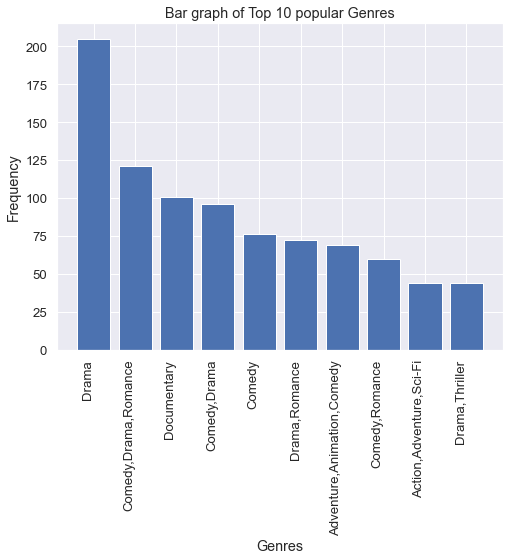

In [245]:
# top 10 most popular movie genres
top_10 = tot_movies.head(10)
#set figsize
plt.subplots(figsize=(8,6))
plt.bar(top_10.index, top_10.values)
#setting x, y labels and titles
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Bar graph of Top 10 popular Genres')
#setting ticks
plt.xticks(rotation=90, ha = 'right')
plt.show()


From the bar graph above we see that the most popular genre with the most frequency is Drama, followed by Comedy,Drama,Romance as the second and Documentary as the third.

### Identifying most popular genre based on Rating

In [274]:
data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

genres
Adventure                       9.2
Action,Sport                    8.4
Biography,Documentary,Family    8.3
Adventure,Drama,Sci-Fi          8.3
Fantasy                         8.2
                               ... 
Fantasy,Horror                  3.8
Drama,Mystery,Western           3.4
Action,Drama,Music              3.4
Comedy,Family,Sci-Fi            2.6
Comedy,Thriller                 2.1
Name: averagerating, Length: 294, dtype: float64

### Genre with Highest Domestic Gross(Most profitable locally)

In [246]:
data.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)

genres
Sci-Fi                     4.126000e+08
Adventure,Drama,Sport      4.007000e+08
Action,Adventure,Sci-Fi    2.258432e+08
Adventure,Drama,Sci-Fi     2.082000e+08
Documentary,Drama,Sport    2.067250e+08
                               ...     
Comedy,Crime,History       4.800000e+03
Biography                  4.300000e+03
Fantasy,Thriller           1.400000e+03
Comedy,Thriller            8.000000e+02
Animation,Drama            6.000000e+02
Name: domestic_gross, Length: 294, dtype: float64

In [247]:
# create a variable that stores genres and domestic_gross and sort it in descending order
most_popular = data.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)
most_popular.head(10)


genres
Sci-Fi                      4.126000e+08
Adventure,Drama,Sport       4.007000e+08
Action,Adventure,Sci-Fi     2.258432e+08
Adventure,Drama,Sci-Fi      2.082000e+08
Documentary,Drama,Sport     2.067250e+08
Adventure,Fantasy           1.929000e+08
Biography,Drama,Musical     1.743000e+08
Action,Adventure,Mystery    1.509000e+08
Animation,Comedy,Family     1.458669e+08
Comedy,Music                1.446000e+08
Name: domestic_gross, dtype: float64

From the above cell, we see that Sci-Fi has the highest revenue locally

### Visualize using bar plot 

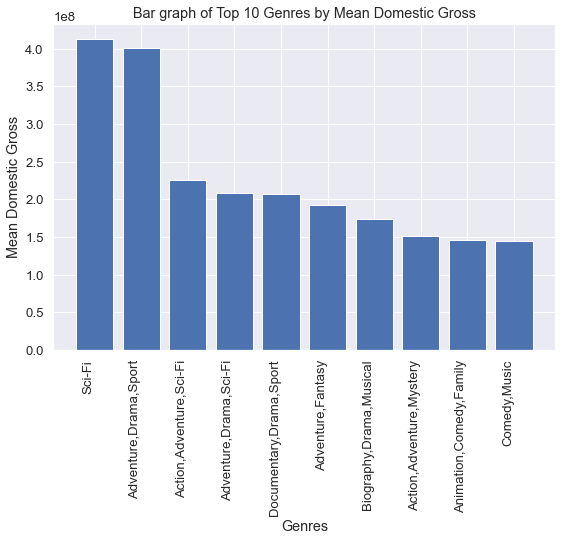

In [248]:
# Create a bar plot that displays the first 10 genres with highest domestic gross
top_10= most_popular.head(10)
plt.subplots(figsize=(9,6))
plt.bar(x=top_10.index, height=top_10.values)
#set x,y and title labels
plt.xlabel('Genres')
plt.ylabel('Mean Domestic Gross')
plt.title('Bar graph of Top 10 Genres by Mean Domestic Gross')
plt.xticks(rotation=90, ha = 'right')
plt.show()

From the bar graph above we notice that Sci-Fi has the heighest domestic gross followed by Adventure,Drama,Sport Genre.

### Genre with the highest foreign gross(most profitable internationally)

In [249]:
# create a variable that stores genres and domestic_gross and sort it in descending order
profitable_foreign = data.groupby('genres')['foreign_gross'].mean().sort_values(ascending=False)
profitable_foreign.head(10)

genres
Adventure,Drama,Sport        8.757000e+08
Adventure,Fantasy            5.111333e+08
Adventure,Drama,Sci-Fi       4.455500e+08
Sci-Fi                       4.093000e+08
Action,Adventure,Sci-Fi      3.441977e+08
Action,Adventure,Thriller    2.806882e+08
Action,Adventure,Fantasy     2.796138e+08
Adventure,Mystery,Sci-Fi     2.769000e+08
Adventure,Family,Fantasy     2.695500e+08
Biography,Drama,Musical      2.607000e+08
Name: foreign_gross, dtype: float64

### Visualizing with bar garph

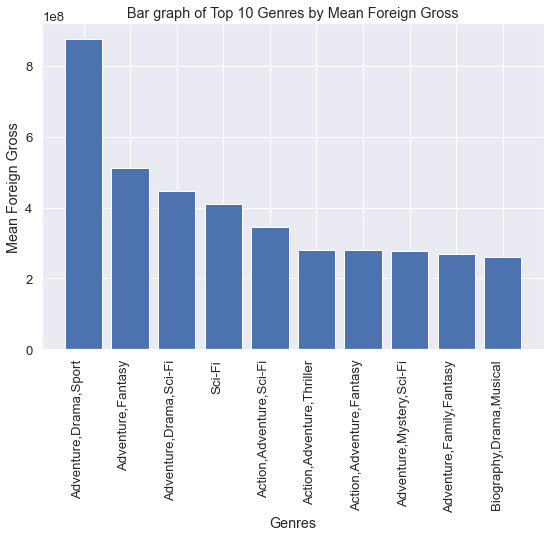

In [250]:
# Create a bar plot that displays the first 10 genres with highest foreign gross
top_10_foreign= profitable_foreign.head(10)
plt.subplots(figsize=(9,6))
plt.bar(x=top_10_foreign.index, height=top_10_foreign.values)
#set x,y and title labels
plt.xlabel('Genres')
plt.ylabel('Mean Foreign Gross')
plt.title('Bar graph of Top 10 Genres by Mean Foreign Gross')
plt.xticks(rotation=90, ha = 'right')
plt.show()

From the above we see that the genre with the most revenue internationally is a genre with Adventure,Drama,Sport followed by one with Adventure, Fantasy

## What is the averagerating distribution

In [251]:
  data['averagerating'].value_counts()

6.3    116
6.2    116
6.6    112
6.8    110
6.4    109
      ... 
2.1      1
1.9      1
3.1      1
3.3      1
9.1      1
Name: averagerating, Length: 70, dtype: int64

We will create a histogram to show the distribution of our average ratings

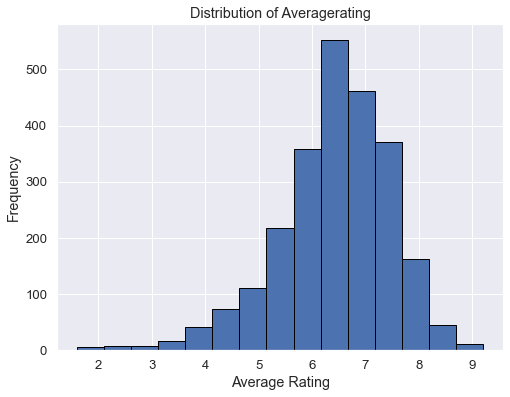

In [252]:
#create a variable 'rating' with our data
rating= data['averagerating']
#create histogram
plt.subplots(figsize=(8,6))
plt.hist(rating, bins=15, edgecolor='black')
#set labels
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Averagerating')
plt.show()

From the visualization above, we notice that the distribution is skewed to the right meaning that most films were highly rated and few have low ratings. This could mean that most viewers have a preference for highly rated movies.

### Is there a relation between averagerating and number of votes, runtime and revenue, runtime and rating, runtime and number of votes

In [266]:
data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,23400000.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013


First we will select the columns we want to check their correlations

In [267]:
# select columns and store them in corr_data variable and preview them
corr_data = data[['domestic_gross', 'foreign_gross', 'averagerating', 'numvotes', 'runtime_minutes']]
corr_data

,domestic_gross,foreign_gross,averagerating,numvotes,runtime_minutes
0,1100000.0,23400000.0,7.1,15378,103.0
1,744000.0,8000000.0,6.1,37886,124.0
2,744000.0,8000000.0,6.0,6,89.0
3,744000.0,8000000.0,5.7,127,121.0
4,58200000.0,129900000.0,7.3,275300,114.0
...,...,...,...,...,...
2442,31700000.0,1800000.0,4.6,3618,110.0
2443,1200000.0,23400000.0,8.5,43409,139.0
2444,72000.0,23400000.0,5.4,673,135.0
2445,37700.0,23400000.0,4.6,61,103.0


In [268]:
#check the correlations
corr_data.corr()

,domestic_gross,foreign_gross,averagerating,numvotes,runtime_minutes
domestic_gross,1.000000,0.824775,0.152556,0.654843,0.145883
foreign_gross,0.824775,1.000000,0.143412,0.596109,0.168842
averagerating,0.152556,0.143412,1.000000,0.313393,0.126887
numvotes,0.654843,0.596109,0.313393,1.000000,0.292399
runtime_minutes,0.145883,0.168842,0.126887,0.292399,1.000000


#### Visualize the correlations using correlation matrix heatmap

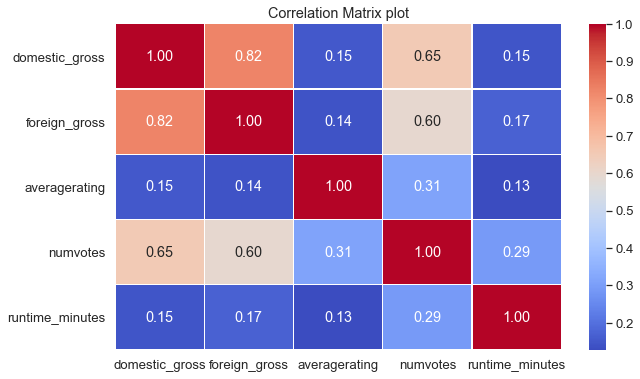

In [273]:
# store selected_data.corr() in the variable(correlation)
correlation = corr_data.corr()
#create correlation matrix heat map
# Set the figure size
plt.subplots(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt="0.2f", cmap="coolwarm", linewidths=0.3)
#Set title
plt.title("Correlation Matrix plot") 
plt.show()

With a correlation above 0.7 being a strong positive correlation and 0.50 to 0.70 being average positive correlation, and 0.30 and below being weak positive correlation.
From the heatmap plot above, we see that averagerating and number of votes have close to weak correlation, runtime and both foreign and domestic revenue have a weak correlation, runtime and rating have weak correlation, runtime and number of votes have weak correlation. 